## Introduction

In this activity we will use python and some of the built in functions to model a solute diffusion process. A complex function that arrises in many analytical solutions is termed the [Error function](https://en.wikipedia.org/wiki/Error_function).

To utilize these functions you will need to install the [SciPy library](https://www.scipy.org/). To do this in Windows you can open your 'Anaconda Powershell Prompt' (by typing this into the Windows search bar); this should have been installed with the Anaconda Python distribution. On a Mac simply open your terminal. In the Prompt/terminal type (you may need to replace 'pip' with 'pip3' depending on your Python package):

```pip install scipy``` 

To test that you have SciPy properly install try running the following cell.

In [56]:
# Import only the math.erfc (complementary error function) and math.erf (error function) from the math Library
from scipy.special import erfc as erfc
from scipy.special import erf as erf

# Print the error function of a few different numbers
print (erfc(1))
print(erfc(0))

0.15729920705028516
1.0


We also need to import a few useful packages for working with vectors (numpy) and for plotting (matplotlib.pyplot)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

Now we can plot the error function and complementary error function (this as a function equal to 1-erf(x)) in this example to better understand their shape:

In [ ]:
# define variable 'xe' with 100 values from -3 to 3
xe = np.linspace(-3, 3, num=100)
# plot error function
plt.plot(xe, erf(xe))
# plot complementary error function
plt.plot(xe, erfc(xe))

In [ ]:
# plot complementary error function
plt.plot(xe, erfc(xe))
# equivalent to complementary error function
plt.plot(xe, 1-erf(xe))

## Diffusion function definition

Now let's define a function that calculates the diffusion between a region with solute initially present with a concentration equal to one. This region is at x<0

In [ ]:
def diffusion_fun(x, t, Df, C0):
    # Equation for concentration profile as a function of space (x) and time (t)
    C = C0*(erfc((x)/(2*np.sqrt(Df*t))))
    # Return the concentration (C) from this function
    return C

Aside: The square root function also exists in the 'math' library. It is important to use the 'numpy' library if we want to take the square root of an array of numbers. For example:

In [ ]:
np.sqrt(xe[-5:])

Attempting the same operation with the math library will result in an error stating that 'only size-1 arrays can be converted to Python scalars'. This means you can only perform the operation on scalars.

In [ ]:
import math
math.sqrt(xe[-5:])

In [ ]:
# Define diffusion coefficient
Df = 5E-9
# Define spatial coordinates
x = np.linspace(0, 1, num=100)
# Define initial concentration
C0 = 1

# Profile after one second
t = 1
C = diffusion_fun(x, t, Df, C0)

plt.plot(x, C)

What are the units of space, time, and the diffusion coefficient?

In [ ]:
# Profile after one day
t = 60*60*24
C = diffusion_fun(x, t, Df, C0)

plt.plot(x, C)

In [ ]:
# Profile after 1 month
t = 60*60*24*30
C = diffusion_fun(x, t, Df, C0)

plt.plot(x, C)

Note that you can use the error function or the complementary error function to define your diffusion solution. This is demonstrated in the example below.

In [ ]:
def diffusion_fun_erf(x, t, Df, C0):
    # Equation for concentration profile as a function of space (x) and time (t)
    C = C0*(1-erf((x)/(2*np.sqrt(Df*t))))
    # Return the concentration (C) from this function
    return C

In [ ]:
# Profile after 1 month
t = 60*60*24*30
C = diffusion_fun_erf(x, t, Df, C0)

plt.plot(x, C)

## Activity:

#### Using this code, test the impact of different diffusion coefficients. 

How do you expect this to change the shape of this curve? 

Plot the case of Df = 1E-9 after 1 day, 1 month, and 6 months. In a second cell plot the case of Df = 1E-10 after 1 day, 1 month, and 6 months. Note that the time in the function we defined above is in units of seconds.

In each plot that you generate make sure to add axis labels and a legend.

In [77]:
# cell 1 for calculating and plot concentration profiles for Df = 1E-9

In [78]:
# cell 2 for calculating and plot concentration profiles for Df = 1E-10

## Bonus: Random Walks
Random walks are a classic way of illustrating the Brownian motion of particles at the molecular scale that drives the diffusion processes that we observe in porous media. The demo below shows the random nature of particle motion of 3 particles starting in three different locations. Each particle is a different color and starting point is indicated by the black dots.

(-41.36306860389736, 27.91036150136852, -24.924135645123528, 46.65886806508469)

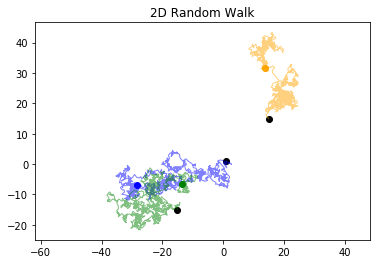

In [81]:
# Define random walk function
def random_walk_2D(step_n, origin):
    # Simulate steps in 2D
    dims = 2
    steps = np.random.rand(step_n, dims)*2-1
    path = np.concatenate([origin, steps]).cumsum(0)
    return path

step_n = 1000
# Plot the path of particle 1
# starting particle location
origin = np.ones((1,dims))
# call function
path = random_walk_2D(step_n, origin)
# Plot starting location
plt.plot(path[0,0], path[0,1], c='black', marker='o')
# Plot path
plt.plot(path[:,0], path[:,1], c='blue',alpha=0.5, lw=1, ls='-',)
# Plot ending location
plt.plot(path[-1:,0], path[-1:,1], c='blue', marker='o')

# Plot the path of another particle
# starting particle location
origin = np.ones((1,dims))*15
# call function
path = random_walk_2D(step_n, origin)
# Plot starting location
plt.plot(path[0,0], path[0,1], c='black', marker='o')
plt.plot(path[:,0], path[:,1], c='orange',alpha=0.5, lw=1, ls='-',)
plt.plot(path[-1:,0], path[-1:,1], c='orange', marker='o')

# Plot the path of a third particle
# starting particle location
origin = np.ones((1,dims))*-15
# call function
path = random_walk_2D(step_n, origin)
# Plot starting location
plt.plot(path[0,0], path[0,1], c='black', marker='o')
plt.plot(path[:,0], path[:,1], c='green',alpha=0.5, lw=1, ls='-',)
plt.plot(path[-1:,0], path[-1:,1], c='green', marker='o')

plt.title('2D Random Walk')
plt.axis('equal')